# SVD and SVM.. They don't have much in common!

## Principal Component Analysis and the SVD

SVD (Singular Value Decomposition) is a linear algebra method which extracts the principal, information-rich axes in a matrix. Mathematically, it takes a matrix $A$ and decomposes into 3 matrices:

$A = U \Sigma V^T$.

* U contains the principal row

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

# Inline / non interactive plots
%matplotlib inline

# Titanic is a class that I wrote which loads 
# the data and offers different methods to 
# analyze and vizualise them.
from titanic_class import Titanic 

# Load the data
t = Titanic()

# t.pnorm contains the column names of the
# normalized/scaled data. Each column is 
# scaled by its standard deviation and 
# centered around its mean.
cols = t.pnorm

# Our training data set
X = t.train[cols].dropna()
Xs = t.train.loc[X.index, 'Survived']


# Our training dataset with NaN values
Xna  = t.train[cols]

# Display the data
X.head()

,Pclass_norm,logage_norm,numsex_norm,SibSp_norm,Parch_norm,logfare_norm,ticketnum_mod_norm,ticketnum_grp_clip_norm
PassengerId,,,,,,,,
1,0.826913,-0.133520,-0.737281,0.432550,-0.473408,-0.910206,-0.288672,-0.949939
2,-1.565228,0.563038,1.354813,0.432550,-0.473408,1.368848,-0.448052,-0.949939
3,0.826913,0.079387,1.354813,-0.474279,-0.473408,-0.821443,-1.176102,1.828613
4,-1.565228,0.458228,1.354813,0.432550,-0.473408,1.075214,-0.617426,-0.255301
5,0.826913,0.458228,-0.737281,-0.474279,-0.473408,-0.805838,2.043970,1.133975


In [2]:
# Compute the SVD decomposition of X
U, S, Vt = np.linalg.svd(X , full_matrices=False)

# pick up the first 2 rows of V transpose. These
# will be the 2 principal axes onto which all the
# data in X will be projected
princip = Vt[0:2,:]

# Print the principal axes
print(princip.round(3))

[[-0.543  0.1    0.233  0.075  0.166  0.527 -0.306 -0.486]
 [ 0.189 -0.514  0.278  0.411  0.618  0.154  0.134  0.173]]


In [3]:
# Check that the axes are represented by unit vectors
print( (princip**2).sum(axis=1) )

[1. 1.]


In [4]:
# Name for the columns containing the projection
# onto the principal axes: c0, c1
newcols = ['c'+str(ii) for ii in range(princip.shape[0])]

# Create pandas DataFrame which will contain the
# projected data
projx = pd.DataFrame(index=X.index, columns=newcols, 
                     dtype=np.float)

# Project the data, using a dot-product on each
# data point in X
for ii in projx.index :
    projx.loc[ii,:] = princip @ X.loc[ii,:]

Text(0,0.5,'c1')

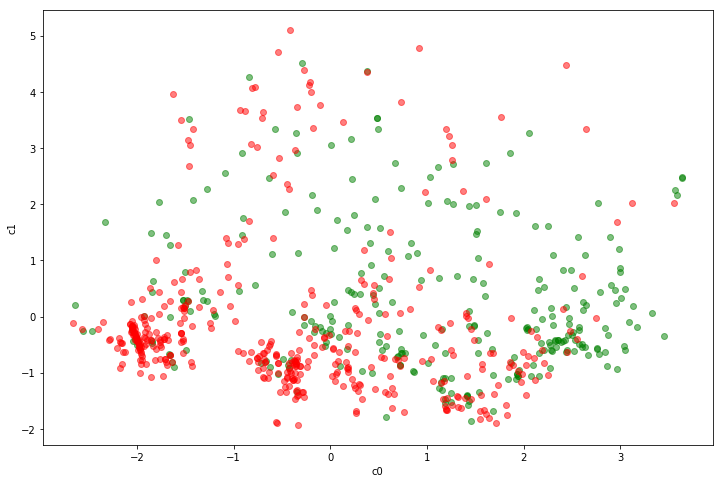

In [5]:
# Add the Surived information
projx.loc[:, 'Survived'] = Xs

# Plot the surviors (green) and sunken (red) on 
# our new principal axes
pl.ion()
pl.rcParams['figure.figsize'] = [12,8]

pl.plot(projx.c0[projx.Survived==1], 
        projx.c1[projx.Survived==1], 'og', alpha=0.5)
pl.plot(projx.c0[projx.Survived==0], 
        projx.c1[projx.Survived==0], 'or', alpha=0.5)

pl.xlabel('c0')
pl.ylabel('c1')

So here we have the data shown projected on the 2 dimensions which are the best "reprentatives" of the dataset $X$. For example the vector ``Vt[0,:]`` has length 8, which is the number of dimensions of a data point (or an instance) taken from $X$. This vector is the most typical, or representative data point, when we look at all instances together.

Text(0,0.5,'c1')

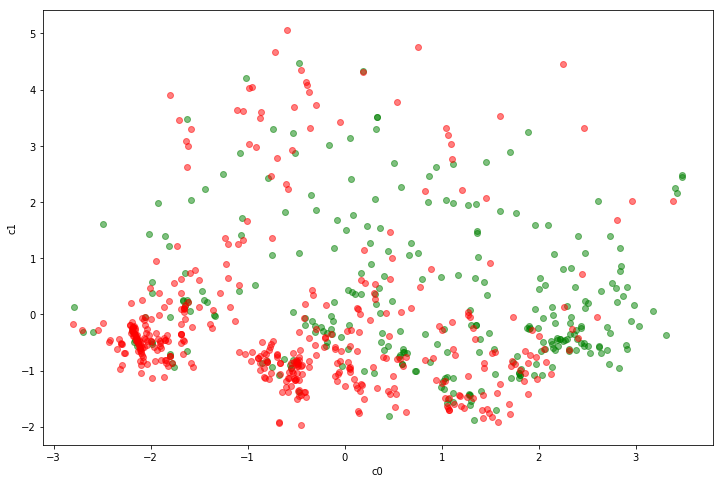

In [6]:
from sklearn.decomposition import PCA

# compute the PCA transform using Scikit Learn's
# implementation
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

# Save it in a pandas object
projx2 = pd.DataFrame(index=X.index, columns=newcols, 
                      dtype=np.float)

# Fill the data from the result above
projx2.loc[:,['c0','c1']] = X2D

# Add the Surived information
projx2.loc[:, 'Survived'] = Xs

# plot
pl.plot(projx2.c0[projx.Survived==1], 
        projx2.c1[projx.Survived==1], 'og', alpha=0.5)
pl.plot(projx2.c0[projx.Survived==0], 
        projx2.c1[projx.Survived==0], 'or', alpha=0.5)


pl.xlabel('c0')
pl.ylabel('c1')

Which is basically the same as what I computed from the SVD decomposition. There's just a small shift along the c0 axis, which shouldn't impact things (and which I wonder where it comes from!)

### We can also project on 3D

In other words the first *three* principal axes:

In [7]:
# first 3 principal axes
princip3 = Vt[0:3,:]

# Name for the columns containing the projection
# onto the principal axes: c0, c1
newcols3 = ['c'+str(ii) for ii in range(princip3.shape[0])]

# Create pandas DataFrame which will contain the
# projected data
projx3 = pd.DataFrame(index=X.index, columns=newcols3, 
                      dtype=np.float)

# Project the data, using a dot-product on each
# data point in X
for ii in projx3.index :
    projx3.loc[ii,:] = princip3 @ X.loc[ii,:]
    
# Add the Surived information
projx3.loc[:, 'Survived'] = Xs

Text(0.5,0,'c2')

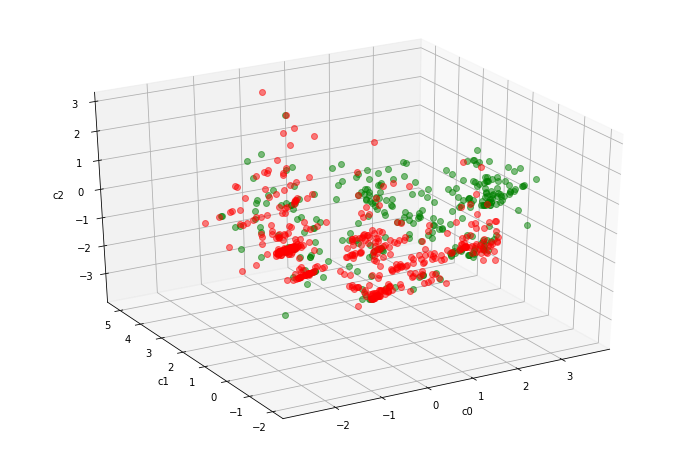

In [8]:
fig = pl.figure() 
ax= fig.add_subplot(1,1,1, projection='3d', azim=-120, elev=30)
ax.plot(projx3.c0[projx3.Survived==1], 
        projx3.c1[projx3.Survived==1],
        projx3.c2[projx3.Survived==1], 'og', alpha=0.5)
ax.plot(projx3.c0[projx3.Survived==0], 
        projx3.c1[projx3.Survived==0],
        projx3.c2[projx3.Survived==0], 'or', alpha=0.5)

ax.set_xlabel('c0')
ax.set_ylabel('c1')
ax.set_zlabel('c2')

The 3D plot gives us a little more separation.

### Since we're doing projection...

Why don't we even try the Fisher Linear Discriminant (FLD) projection. This method takes as input 2 or more classes of data point. It then looks for a projection that minimizes the ratio of standard deviations within each cluster to the average distance between clusters. This way we have the most separated clusters.

However FLD has a limitation that the maximum dimensions it can project down to is one less than the number of classes. So in this case it would project down to 1D. I've written a function that does the FLD projection:

In [9]:
# first 4 principal axes
princip4 = Vt[0:4,:]

# Name for the columns containing the projection
# onto the principal axes: c0, c1
newcols4 = ['c'+str(ii) for ii in range(princip4.shape[0])]

# Create pandas DataFrame which will contain the
# projected data
projx4 = pd.DataFrame(index=X.index, columns=newcols4, 
                      dtype=np.float)

# Project the data, using a dot-product on each
# data point in X
for ii in projx4.index :
    projx4.loc[ii,:] = princip4 @ X.loc[ii,:]
    
# Add the Surived information
projx4.loc[:, 'Survived'] = Xs

Text(0.5,0,'New axis')

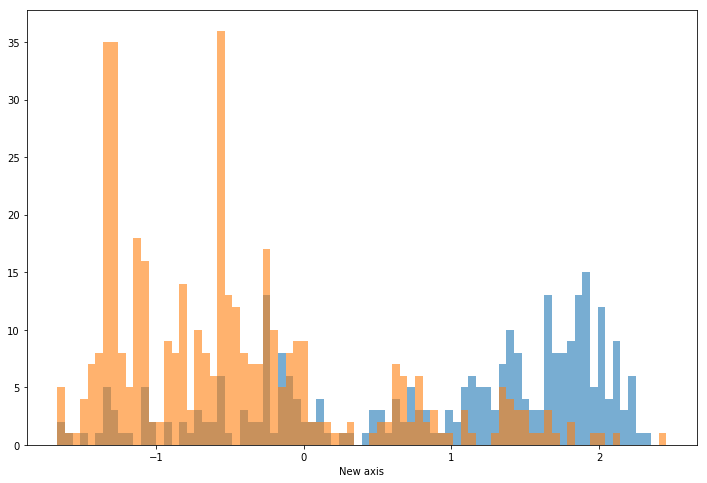

In [10]:
import fisher_projection

fisher_projection.sepnd([projx4[projx4.Survived==1], projx4[projx4.Survived==0]], 
                        newcols4, '', 1, '')
pl.xlabel('New axis')

But now, I want to first cluster my data points and then project them onto 2 or 3 dimensions with FLD.

In [11]:
from sklearn.cluster import KMeans 

# cluster the data from the PCA-projected set
kmn1 = KMeans(n_clusters=4)
kmn1.fit(projx4[projx4.Survived==1])
surv_labels = pd.Series( kmn1.labels_, index=projx4[projx4.Survived==1].index)

kmn2 = KMeans(n_clusters=4)
kmn2.fit(projx4[projx4.Survived==0])
sunk_labels = pd.Series( kmn2.labels_, index=projx4[projx4.Survived==0].index)

In [12]:
# cluster the data from the original set
kmn3 = KMeans(n_clusters=4)
kmn3.fit(X[Xs==1])
surv_labels_orig = pd.Series( kmn3.labels_, index=X[Xs==1].index)

kmn4 = KMeans(n_clusters=4)
kmn4.fit(X[Xs==0])
sunk_labels_orig = pd.Series( kmn4.labels_, index=X[Xs==0].index)

Let's plot the cluster with different colors to see how separated they are. But ultimately, I want to see how the sunken and survivor population are separated. So I will revert back to ploting just the red and green colors corresponding to the sunken and survivor populations, respectively.

Text(0.5,1,'The PCA-projected data')

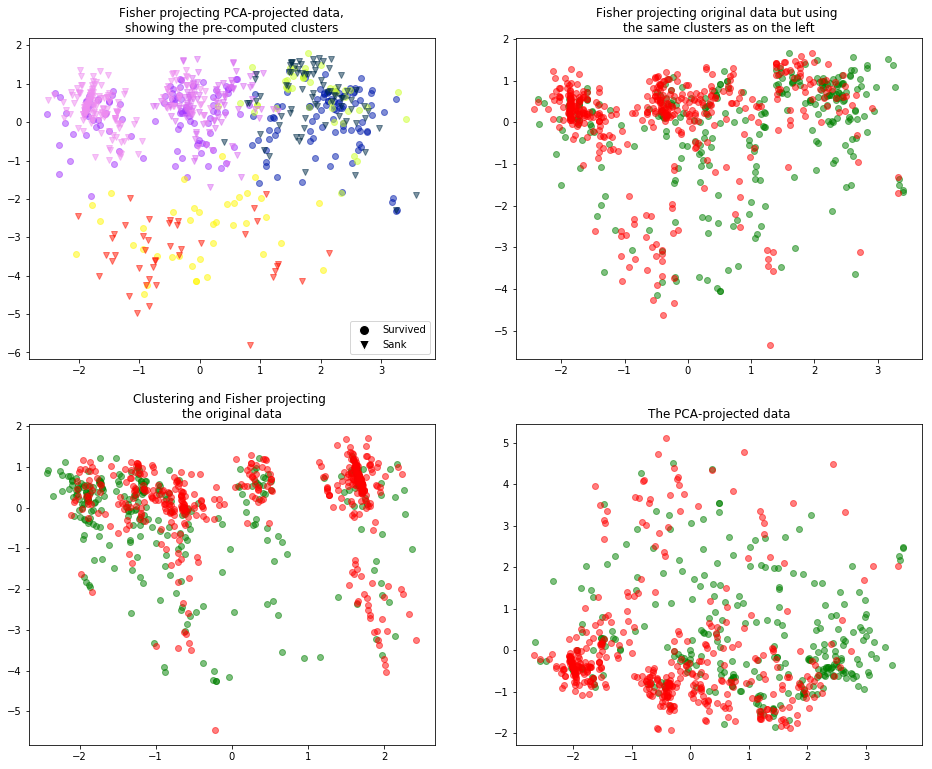

In [13]:
fig, axs = pl.subplots(2,2, figsize=[16,13])

from matplotlib.lines import Line2D

### Fisher projecting the PCA projected data
surv_sets = []
for label in surv_labels.unique() : 
    indeces = surv_labels.index[surv_labels==label]
    surv_sets.append( projx4.loc[indeces, :] )
    
sunk_sets = []
for label in sunk_labels.unique() : 
    indeces = sunk_labels.index[sunk_labels==label]
    sunk_sets.append( projx4.loc[indeces, :] )
    
yy1, eignv1, lmbd1, __ = fisher_projection.sepnd(surv_sets+sunk_sets, newcols4, 
                         'o'*len(surv_sets)+'v'*len(sunk_sets), 2, 
                         '', ax=axs[0,0])
axs[0,0].set_title('Fisher projecting PCA-projected data,\nshowing the pre-computed clusters')
triangle = Line2D([0], [0], marker='v', color='w', markerfacecolor='k', markersize=10)
circle = Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10)
axs[0,0].legend((circle, triangle), ('Survived', 'Sank'), loc='lower right')


### using all 8 dimensions, but with the same clusters
surv_sets2 = []
for label in surv_labels.unique() : 
    indeces = surv_labels.index[surv_labels==label]
    surv_sets2.append( X.loc[indeces, :] )
    
sunk_sets2 = []
for label in sunk_labels.unique() : 
    indeces = sunk_labels.index[sunk_labels==label]
    sunk_sets2.append( X.loc[indeces, :] )
    
yy2, eigenv2, lmbd2, __ = fisher_projection.sepnd(surv_sets2+sunk_sets2, cols, 
                          'o'*(len(surv_sets2)+len(sunk_sets2)), 2, 
                          'g'*len(surv_sets2)+'r'*len(sunk_sets2), ax=axs[0,1])
axs[0,1].set_title('Fisher projecting original data but using \nthe same clusters as on the left')



### clustering from the original dataset
surv_sets_orig = []
for label in surv_labels_orig.unique() : 
    indeces = surv_labels_orig.index[surv_labels_orig==label]
    surv_sets_orig.append( X.loc[indeces, :] )
    
sunk_sets_orig = []
for label in sunk_labels_orig.unique() : 
    indeces = sunk_labels_orig.index[sunk_labels_orig==label]
    sunk_sets_orig.append( X.loc[indeces, :] )
    
yy3, eigenv3, lmbd3, __ = fisher_projection.sepnd(surv_sets_orig+sunk_sets_orig, cols, 
                          'o'*(len(surv_sets_orig)+len(sunk_sets_orig)), 2, 
                          'g'*len(surv_sets_orig)+'r'*len(sunk_sets_orig), ax=axs[1,0])
axs[1,0].set_title('Clustering and Fisher projecting \nthe original 8-D data')



### the PCA projected data
axs[1,1].plot(projx.c0[projx.Survived==1], 
            projx.c1[projx.Survived==1], 'og', alpha=0.5)
axs[1,1].plot(projx.c0[projx.Survived==0], 
            projx.c1[projx.Survived==0], 'or', alpha=0.5)
axs[1,1].set_title('The PCA-projected data')

Still a lot of overlap. Interstingly, the FLD method keeps some of the discreteness in the data, as opposed to the PCA projection. That's not surprising because FLD wants to minimize the distances *within* a cluster *and* maximize the distance between cluster. So it probably puts more weight on axes with discrete values, where there's low within-cluster variance.



Text(0.5,0.92,'The PCA-projected data')

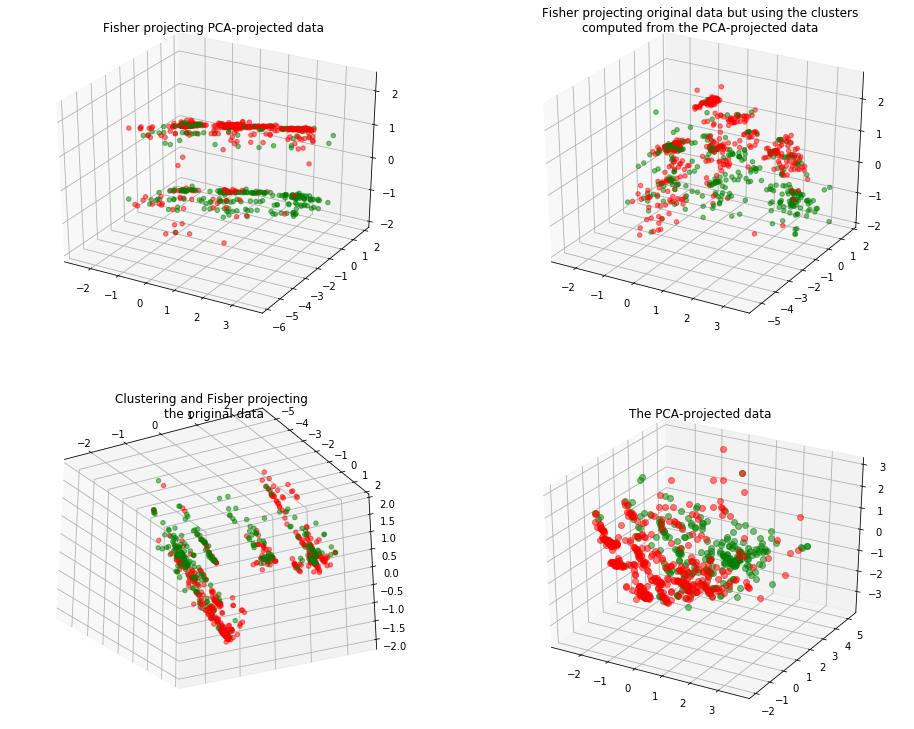

In [18]:
fig = pl.figure(figsize=[16,13])

### Fisher projecting the PCA projected data
ax = fig.add_subplot(221, projection='3d')
yy13d, eign13d, lmbd13d, __ = fisher_projection.sepnd(surv_sets+sunk_sets, newcols4, 
                             'o'*(len(surv_sets)+len(sunk_sets)), 3, 
                             'g'*len(surv_sets)+'r'*len(sunk_sets), ax=ax)
ax.set_title('Fisher projecting PCA-projected data')





### using all 8 dimensions, but with the same clusters
ax = fig.add_subplot(222, projection='3d')
yy23d, eigenv23d, lmbd23d, __ = fisher_projection.sepnd(surv_sets2+sunk_sets2, cols, 
                            'o'*(len(surv_sets2)+len(sunk_sets2)), 3, 
                              'g'*len(surv_sets2)+'r'*len(sunk_sets2), ax=ax)
ax.set_title('Fisher projecting original data but using the clusters\ncomputed from the PCA-projected data')



### clustering from the original dataset
ax = fig.add_subplot(223, projection='3d', elev=-30)
yy33d, eigenv33d, lmbd33d, __ = fisher_projection.sepnd(surv_sets_orig+sunk_sets_orig, cols, 
                              'o'*(len(surv_sets_orig)+len(sunk_sets_orig)), 3, 
                              'g'*len(surv_sets_orig)+'r'*len(sunk_sets_orig), ax=ax)
ax.set_title('Clustering and Fisher projecting \nthe original data')

# The PCA projected data
ax = fig.add_subplot(224, projection='3d') #, azim=-120, elev=30)
ax.plot(projx3.c0[projx3.Survived==1], 
        projx3.c1[projx3.Survived==1],
        projx3.c2[projx3.Survived==1], 'og', alpha=0.5)
ax.plot(projx3.c0[projx3.Survived==0], 
        projx3.c1[projx3.Survived==0],
        projx3.c2[projx3.Survived==0], 'or', alpha=0.5)
ax.set_title('The PCA-projected data')